**Description**

In [1]:
print ('Demo pytorch code for Computer vision and Image analysis : Course project')

Demo pytorch code for Computer vision and Image analysis : Course project


**Running environment options**

Colab: https://colab.research.google.com/

HPC: https://hpc.uni.lu/ (Get accounts early)

Gradients: https://gradient.run/free-gpu

**Libraries**

Pytorch: https://pytorch.org/

Keras: https://keras.io/

Tensorflow: https://www.tensorflow.org/ 

**Mounting Goolge Drive** 

In [2]:
import os

from google.colab import drive
drive.mount('/content/drive')

## Checking if the Google Drive mounted correctly
if(os.path.isdir('/content/drive/MyDrive/')):
  print('Google drive mounted')
  base_dir='/content/drive/MyDrive/Tutorial/'
else: 
  print('Google drive not mounted')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google drive mounted


**Loading data**

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt 
import numpy as np

## Transforms to be applied to the data (Some examples: torchvision.transforms.Resize(),transforms.Normalize())
## Read more: https://pytorch.org/vision/stable/transforms.html
transform = transforms.Compose([transforms.ToTensor()])
transform = transforms.Compose([transforms.ToTensor()])

## Downloading and creating Dataset classes
## For custom classifications datasets refer: https://developpaper.com/detailed-explanation-of-the-use-of-imagefolder-in-pytorch/
## For Spark challenge: https://gitlab.uni.lu/spark-challenge/2021-utils/-/blob/master/utils.py
## train/val/test ref: https://blog.roboflow.com/train-test-split/  
trainset = torchvision.datasets.CIFAR10(root=base_dir+'CIFAR-10/', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root=base_dir+'CIFAR-10/', train=False, download=True, transform=transform)

## Defining classes
classes = ('plane', 'car', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck')   

Files already downloaded and verified
Files already downloaded and verified



 Individual images from the dataset:


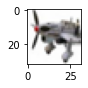

Label: plane


In [4]:
print('\n Individual images from the dataset:')

rand_idx=49
plt.figure(figsize=(1,1))
plt.imshow(transforms.ToPILImage()(trainset[rand_idx][0]))
plt.show()
print('Label:',classes[trainset[rand_idx][1]])

In [5]:
## Creating DataLoaders
## Read more: https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset
batch_size_train=256
batch_size_test=2048
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size_train, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size_test, shuffle=False)


 Sample images from the dataset:


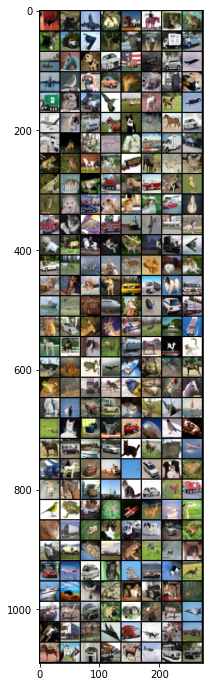

  cat   dog plane  deer truck horse   cat  frog   cat truck plane  deer  deer  bird truck   car  ship horse   dog   car   dog plane   car plane plane  bird   dog   car  bird   dog horse   dog truck   dog truck  bird plane   dog horse plane plane   dog   car horse   cat  bird horse   car horse  deer  frog  deer   dog  ship truck   car  frog  frog horse horse truck  deer  frog   cat  frog   cat  frog truck horse truck  frog  bird  bird   dog   car   dog   cat   dog   car  bird truck   cat   cat truck  ship plane plane horse   dog  deer horse   cat  deer truck truck plane   car horse plane   dog  deer  frog   dog   dog   cat   cat   dog   dog   car truck   dog truck  ship  deer  deer plane   dog  bird   car truck   cat   car  deer  deer   car horse  ship  ship horse horse   dog  deer truck horse horse   cat  bird   dog  frog plane  ship  frog  frog horse  frog  deer truck horse  bird   car  bird horse   dog  bird  deer   car   cat  deer plane  ship  deer   cat   car  bird   car plane  bir

In [6]:
## Get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

## Show images
print('\n Sample images from the dataset:')
img_samples_grid=torchvision.utils.make_grid(images)
plt.figure(figsize=(12,12))
plt.imshow(transforms.ToPILImage()(img_samples_grid))
plt.show()
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size_train))) 

**Creating CNN model**

In [7]:
import torch.nn as nn
import torch.nn.functional as F

## Defining a convolutional neural network
## Available layers: https://pytorch.org/docs/stable/nn.html
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

**Defining loss function**

In [8]:
import torch.optim as optim

## Defining loss function to be used
criterion = nn.CrossEntropyLoss()
## Optimizer to be used (Some commonly used optimizers are: SGD,Adam etc)
optimizer = optim.Adam(net.parameters(),lr=0.001)

In [10]:
def testing():
  correct = 0
  total = 0
  ## Calculating classification accuracy on test dataset
  for data_test in testloader:
          inputs_test, labels_test = data_test
          outputs_test = net(inputs_test)

          predicted_test = torch.argmax(outputs_test.data, 1)
          total += labels_test.size(0)
          correct += (predicted_test == labels_test).sum().item()

  return (correct,total)

**Training**

In [11]:
## loop over the dataset multiple times
nb_epoch=10
loss_per_epoch_train = []
acc_per_epoch_test=[]

correct,total=testing()
print('test accuracy before training',(100 * correct / total))  

print('============================Training: Start============================')
for epoch in range(nb_epoch):  

        loss_train=0
        for i, data in enumerate(trainloader, 0):
            
            ## Getting inputs
            inputs, labels = data

            ## Gradients set to zero
            optimizer.zero_grad()

            ## Forward pass
            outputs = net(inputs)

            ## Calculating loss
            loss = criterion(outputs, labels)

            ## Calculating gradients
            loss.backward()
            loss_train=loss_train+loss.item()

            ## Updating weights
            optimizer.step()
            
        correct,total=testing()
        print('epoch:',epoch,'train loss:',loss_train,'test acc:',(100 * correct / total))  
        loss_per_epoch_train.append(loss_train)
        acc_per_epoch_test.append((100 * correct / total))

print('============================Training: End============================')


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


test accuracy before training 10.0
============================Training: Start============================
epoch: 0 train loss: 372.04606306552887 test acc: 37.65
epoch: 1 train loss: 319.8249510526657 test acc: 42.02
epoch: 2 train loss: 300.788734793663 test acc: 44.43
epoch: 3 train loss: 286.5899649858475 test acc: 47.62
epoch: 4 train loss: 274.23500895500183 test acc: 49.81
epoch: 5 train loss: 266.2529362440109 test acc: 49.82
epoch: 6 train loss: 257.1444489955902 test acc: 51.09
epoch: 7 train loss: 250.74446654319763 test acc: 53.58
epoch: 8 train loss: 242.3534175157547 test acc: 54.14
epoch: 9 train loss: 237.91807556152344 test acc: 55.94
============================Training: End============================


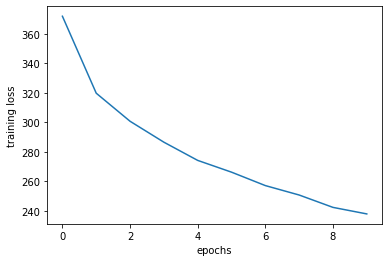

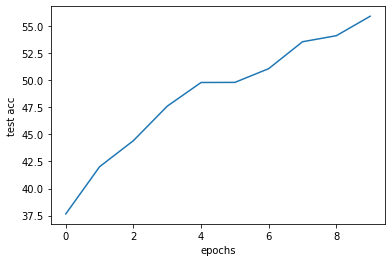

In [12]:
plt.plot(loss_per_epoch_train)
plt.xlabel('epochs')
plt.ylabel('training loss')
plt.show()

plt.plot(acc_per_epoch_test)
plt.xlabel('epochs')
plt.ylabel('test acc')
plt.show()

**Saving the model**


In [13]:
PATH = base_dir+'models/cifar_net.pth'
torch.save(net.state_dict(), PATH)

**Restoring the model**

In [14]:
model_restored = Net()
model_restored.load_state_dict(torch.load(PATH))

<All keys matched successfully>

**Testing**

In [17]:
## Prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

## Collect the correct predictions for each class
for data in testloader:
        images, labels = data
        outputs = model_restored(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

## Print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,accuracy))

Accuracy for class plane is: 59.8 %
Accuracy for class car   is: 74.4 %
Accuracy for class bird  is: 46.4 %
Accuracy for class cat   is: 27.2 %
Accuracy for class deer  is: 46.9 %
Accuracy for class dog   is: 40.0 %
Accuracy for class frog  is: 67.7 %
Accuracy for class horse is: 63.4 %
Accuracy for class ship  is: 76.5 %
Accuracy for class truck is: 57.1 %
